# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [3]:
df = pd.read_csv("customer_shopping_data.csv")

# Exploratory Data Cleaning and Data Analysis

In [4]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [6]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [8]:
df.describe()

,age,quantity,price,invoice_date
count,99457.000000,99457.000000,99457.000000,99457
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00
std,14.990054,1.413025,941.184567,NaN


In [9]:
df.isnull().sum().sum()

0

In [10]:
# Display rows where 'invoice_date' is NaN
nan_rows = df[df['invoice_date'].isna()]
print(nan_rows)

Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall]
Index: []


In [11]:
#creating a new column
df['revenue'] = df['quantity'] * df['price']
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,revenue
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40


# Total Revenue

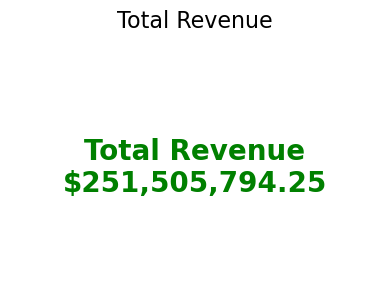

In [12]:
# Calculate the total revenue
total_revenue = df['revenue'].sum()

# Create a figure for displaying the total revenue
fig, ax = plt.subplots(figsize=(4, 3))

# Display the total revenue as text
ax.text(0.5, 0.5, f"Total Revenue\n${total_revenue:,.2f}", 
        fontsize=20, ha='center', va='center', color='green', weight='bold')

# Remove axes for a clean look
ax.axis('off')

# Add a title
plt.title("Total Revenue", fontsize=16, pad=20)

# Show the plot
plt.tight_layout()
plt.show()

# Revenue by Category

C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\1682386434.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='revenue', x='category', data=total_sales, palette="Set1")


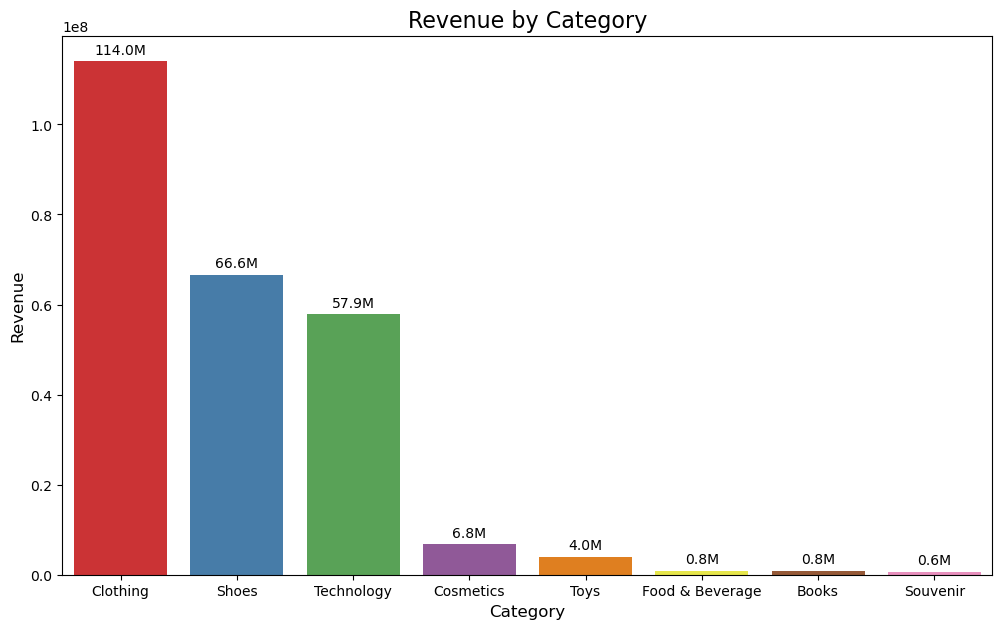

In [13]:
plt.figure(figsize=(12, 7))

total_sales= df.groupby(['category'], as_index=False)['revenue'].sum().sort_values('revenue', ascending=False)

# Create the barplot
ax = sns.barplot(y='revenue', x='category', data=total_sales, palette="Set1")


# Add labels and title
plt.title("Revenue by Category", fontsize=16)
plt.ylabel("Revenue", fontsize=12)
plt.xlabel("Category", fontsize=12)

for bars in ax.containers:
    ax.bar_label(bars,labels=[f"{v / 1_000_000:.1f}M" for v in bars.datavalues], padding=3) 


plt.show()

## The product category of clothing is seems generate the highest sales followed by shoes and technology. 

# Gender wise spend.

C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\1434684727.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='gender', y='revenue', data=total_sales, palette=('red', 'blue'), ci=None)
C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\1434684727.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='gender', y='revenue', data=total_sales, palette=('red', 'blue'), ci=None)


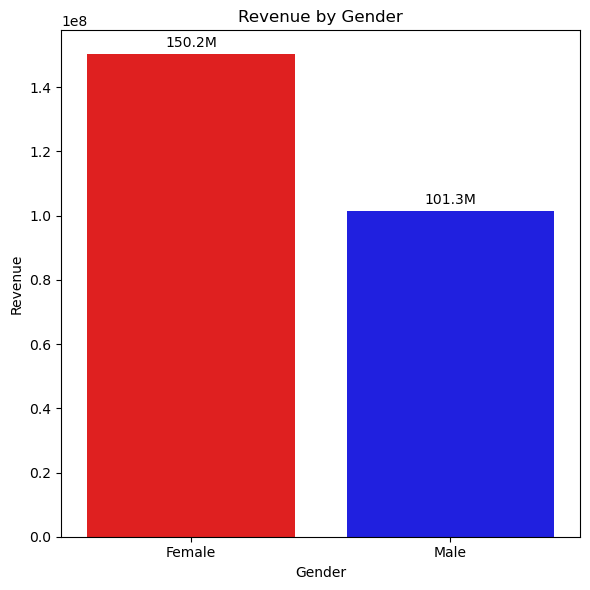

In [14]:
plt.figure(figsize=(6, 6))

total_sales= df.groupby(['gender'], as_index=False)['revenue'].sum().sort_values('revenue', ascending=False)

ax = sns.barplot(x='gender', y='revenue', data=total_sales, palette=('red', 'blue'), ci=None)

# Add title and labels
plt.title('Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Revenue')

# Add data labels in terms of millions
for bars in ax.containers:
    ax.bar_label(bars, labels=[f"{v / 1_000_000:.1f}M" for v in bars.datavalues], padding=3)

# Show the plot
plt.tight_layout()
plt.show()

## Female has generated total sales of 18.8M and male generated 12.7M of sales.

# Gender wise sales in category 

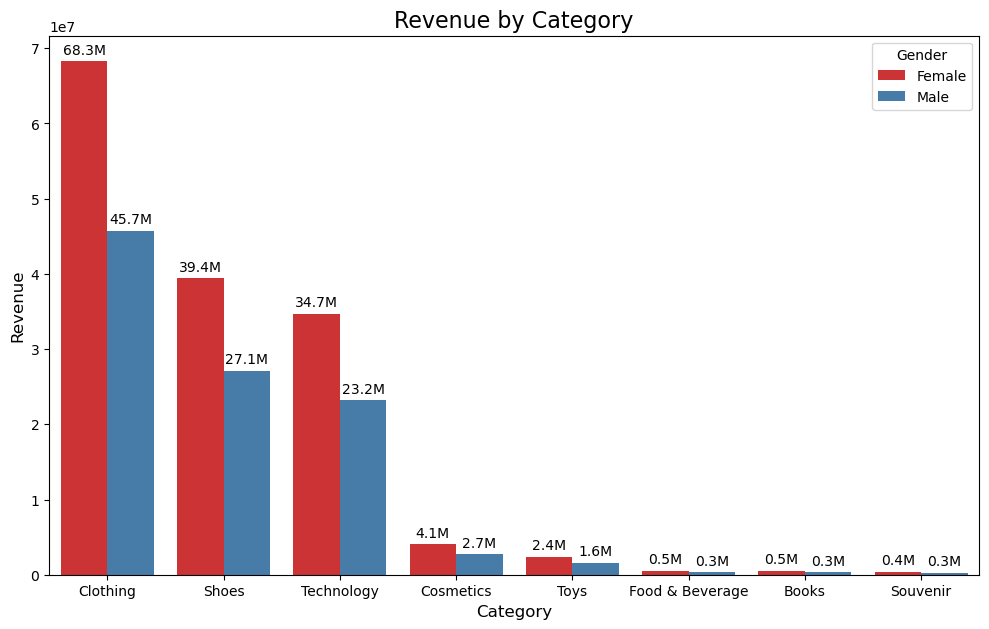

In [15]:
plt.figure(figsize=(12, 7))

total_sales= df.groupby(['category', 'gender'], as_index=False)['revenue'].sum().sort_values('revenue', ascending=False)

# Create the barplot
ax = sns.barplot(y='revenue', x='category',hue='gender', data=total_sales, palette="Set1")


# Add labels and title
plt.title("Revenue by Category", fontsize=16)
plt.ylabel("Revenue", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.legend(title=('Gender'))

for bars in ax.containers:
    ax.bar_label(bars,labels=[f"{v / 1_000_000:.1f}M" for v in bars.datavalues], padding=3) 


plt.show()

# Average Basket Size

C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\2327670456.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='gender', y='revenue', data=average_basket_size, palette=('red', 'blue'), ci=None)
C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\2327670456.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='gender', y='revenue', data=average_basket_size, palette=('red', 'blue'), ci=None)


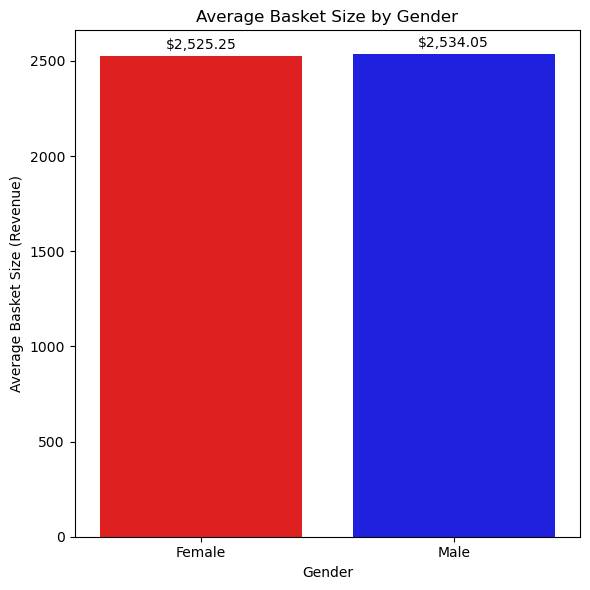

In [16]:
# Calculate average basket size by gender
average_basket_size = df.groupby('gender', as_index=False)['revenue'].mean()

# Plot the average basket size
plt.figure(figsize=(6, 6))

# Create the barplot
ax = sns.barplot(x='gender', y='revenue', data=average_basket_size, palette=('red', 'blue'), ci=None)

# Add title and labels
plt.title('Average Basket Size by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Basket Size (Revenue)')

# Add data labels in terms of currency
for bars in ax.containers:
    ax.bar_label(bars, labels=[f"${v:,.2f}" for v in bars.datavalues], padding=3)

# Show the plot
plt.tight_layout()
plt.show()

## Average basket size by revenue is nearly equal for both genders.

## In summary, females contributed more to the total revenue because they made more purchases, not because they spent significantly more per transaction and males contributed less to the total revenue because they made fewer purchases, even though their spending per transaction was nearly the same as females.

## Creating a new column.

In [17]:
# Create a new column 'age_group' to categorize age
bins = [19, 30, 45, 60, 100]  # Define age ranges
labels = [ '18-30', '31-45', '46-60', '60+']  # Define labels for each range

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,revenue,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,18-30
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,18-30
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,18-30
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,60+
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,46-60


# Revenue by Age Group.

C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\219338936.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_sales= df.groupby(['age_group'], as_index=False)['revenue'].sum().sort_values('revenue', ascending=False)
C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\219338936.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='revenue', x='age_group', data=total_sales, palette="Set1")


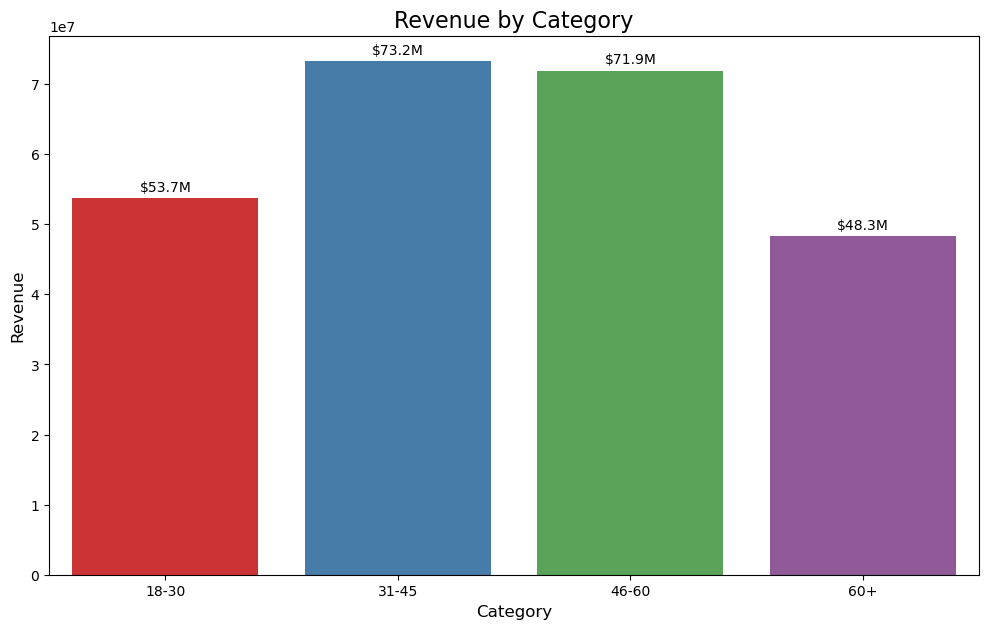

In [41]:
plt.figure(figsize=(12, 7))

total_sales= df.groupby(['age_group'], as_index=False)['revenue'].sum().sort_values('revenue', ascending=False)

# Create the barplot
ax = sns.barplot(y='revenue', x='age_group', data=total_sales, palette="Set1")


# Add labels and title
plt.title("Revenue by Category", fontsize=16)
plt.ylabel("Revenue", fontsize=12)
plt.xlabel("Category", fontsize=12)

for bars in ax.containers:
    ax.bar_label(bars,labels=[f"${v / 1_000_000:.1f}M" for v in bars.datavalues], padding=3) 


plt.show()

In [19]:
# Calculate total revenue for the "Under 18" age group
under_18_revenue = df[df['age_group'] == 'Under 18']['revenue'].sum()

# Display the result
print(f"Total Revenue for 'Under 18' age group: ${under_18_revenue:,.2f}")

Total Revenue for 'Under 18' age group: $0.00


## It shows that age group of 31-45 and 46-60 years old hava spend the most in shopping followed by 18-30 and 60+ age group.

# Average Basket Size by Age Group.

C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\425259752.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_basket_size = df.groupby('age_group', as_index=False)['revenue'].mean()
C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\425259752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='age_group', y='revenue', data=average_basket_size, palette=('red', 'blue'), ci=None)
C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\425259752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='age_group', y='revenue', data=average_basket_size, palette=('red', 'blue'), ci=Non

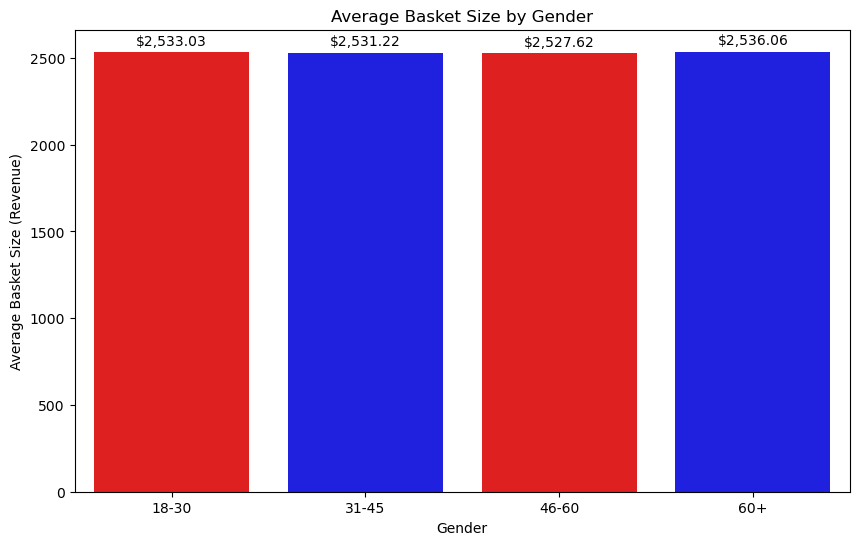

In [20]:
# Calculate average basket size by age group
average_basket_size = df.groupby('age_group', as_index=False)['revenue'].mean()

# Plot the average basket size
plt.figure(figsize=(10, 6))

# Create the barplot
ax = sns.barplot(x='age_group', y='revenue', data=average_basket_size, palette=('red', 'blue'), ci=None)

# Add title and labels
plt.title('Average Basket Size by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Basket Size (Revenue)')

# Add data labels in terms of currency
for bars in ax.containers:
    ax.bar_label(bars, labels=[f"${v:,.2f}" for v in bars.datavalues], padding=3)

plt.show()

## Average Basket Size is nearly the same for all age group.

## The 31-45 and 46-60 age groups generated the highest revenue, while average basket size remained consistent across all age groups.

# Store Analysis.

C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\1691855572.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='revenue', x='shopping_mall', data=total_sales, palette="Set1")


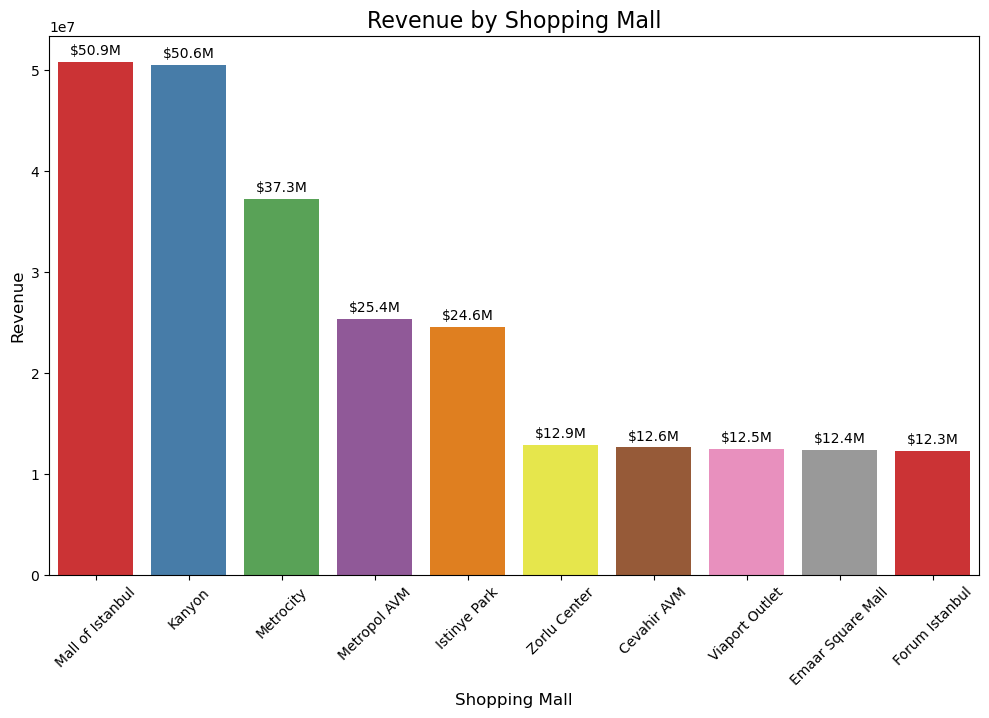

In [40]:
plt.figure(figsize=(12, 7))

# Group data by 'shopping_mall' and calculate total revenue
total_sales = df.groupby(['shopping_mall'], as_index=False)['revenue'].sum().sort_values('revenue', ascending=False)

# Create the barplot
ax = sns.barplot(y='revenue', x='shopping_mall', data=total_sales, palette="Set1")

# Add labels and title
plt.title("Revenue by Shopping Mall", fontsize=16) 
plt.ylabel("Revenue", fontsize=12)
plt.xlabel("Shopping Mall", fontsize=12)  

plt.xticks(rotation=45)

for bars in ax.containers:
    ax.bar_label(bars, labels=[f"${v / 1_000_000:.1f}M" for v in bars.datavalues], padding=3)

plt.show()

## From this we can conclude that Malls of Istanbul has generated the highest sales followed by Kanyon and Metrocity

# Transactions in Shopping Mall

C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\500574089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='shopping_mall', y='customer_id', data=transaction_counts, palette='Set1')


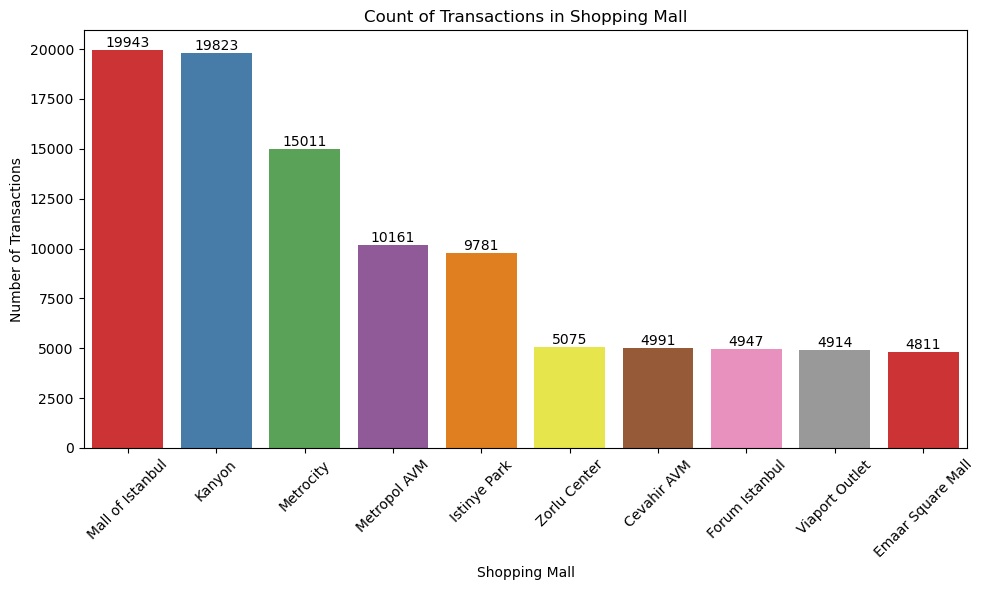

In [ ]:
# Aggregate data by shopping mall
transaction_counts = df.groupby('shopping_mall')['customer_id'].count().reset_index().sort_values('customer_id', ascending=False)   

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='shopping_mall', y='customer_id', data=transaction_counts, palette='Set1')

plt.title('Transactions in Shopping Mall')
plt.ylabel('Number of Transactions')
plt.xlabel('Shopping Mall')

for bar in ax.containers:
    ax.bar_label(bar)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## It seems that Malls of Istanbul has generated the highest transaction followed by Kanyon and Metrocity

# Monthly Sales

C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\1485857540.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='month', y='revenue', data=monthly_sales, palette='Set1')


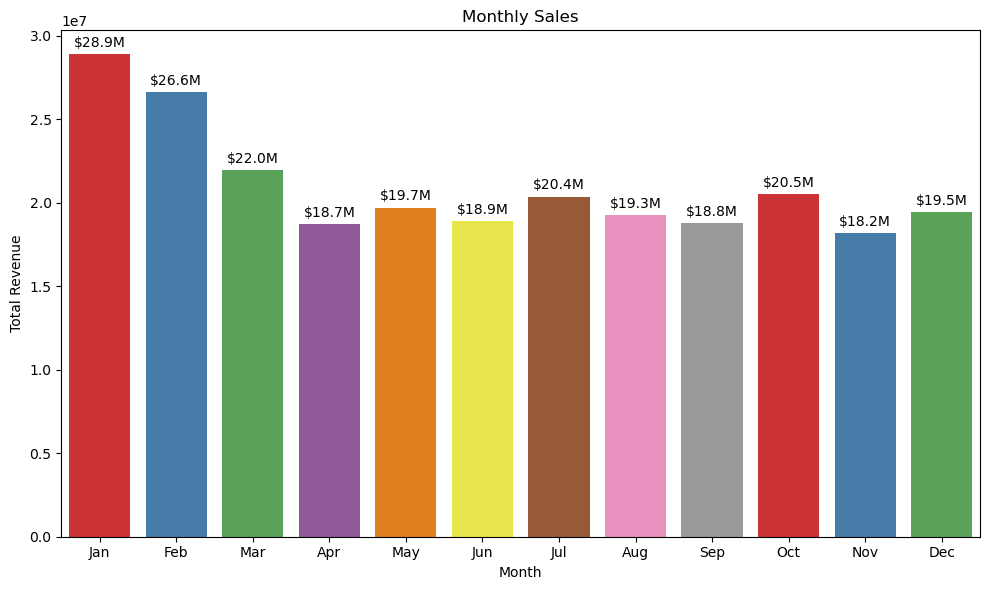

In [39]:
# Extract month and weekday
df['month'] = df['invoice_date'].dt.month
df['weekday'] = df['invoice_date'].dt.day_name()

# Aggregate revenue by month
monthly_sales = df.groupby('month')['revenue'].sum().reset_index()


plt.figure(figsize=(10, 6))

ax = sns.barplot(x='month', y='revenue', data=monthly_sales, palette='Set1')

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Revenue')

for bars in ax.containers:
    ax.bar_label(bars, labels=[f"${v / 1_000_000:.1f}M" for v in bars.datavalues], padding=3)

plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

## January and February show the highest monthly sales, indicating potential seasonal peaks in revenue.

C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\1359372712.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='weekday', y='revenue', data=weekday_sales, palette='Set1')


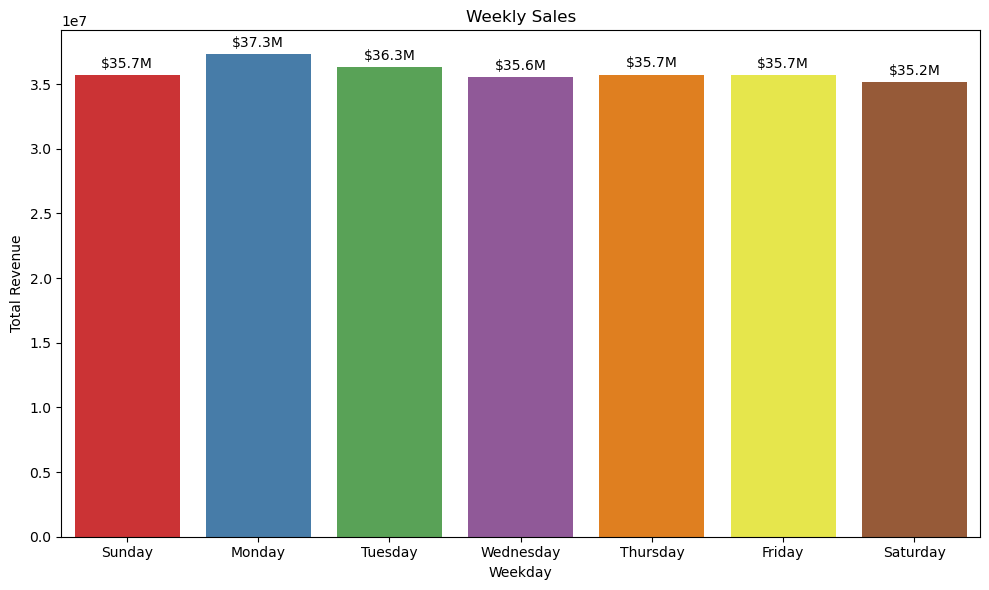

In [46]:
# Aggregate revenue by weekday
weekday_sales = df.groupby('weekday')['revenue'].sum().reset_index()

# Sort weekdays in order
weekday_order = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_sales['weekday'] = pd.Categorical(weekday_sales['weekday'], categories=weekday_order, ordered=True)
weekday_sales = weekday_sales.sort_values('weekday')

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='weekday', y='revenue', data=weekday_sales, palette='Set1')

plt.title('Weekly Sales')
plt.xlabel('Weekday')
plt.ylabel('Total Revenue')

for bars in ax.containers:
    ax.bar_label(bars, labels=[f"${v / 1_000_000:.1f}M" for v in bars.datavalues], padding=3)

plt.tight_layout()
plt.show()

## Monday shows the highest weekly sales, with relatively consistent revenue across other weekdays.

# Pavement Methods

In [47]:
# Group data by payment method
payment_analysis = df.groupby('payment_method').agg(
    total_revenue=('revenue', 'sum'),
    average_spend=('revenue', 'mean'),
    total_items=('quantity', 'sum')
).reset_index()

# Sort by total revenue
payment_analysis = payment_analysis.sort_values(by='total_revenue', ascending=False)

print(payment_analysis)

  payment_method  total_revenue  average_spend  total_items
0           Cash   1.128322e+08    2538.579500       133370
1    Credit Card   8.807712e+07    2521.460129       105045
2     Debit Card   5.059643e+07    2519.867895        60297


C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\3426130949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='payment_method', y='total_revenue', data=payment_analysis, palette='Set1', width = 0.5)


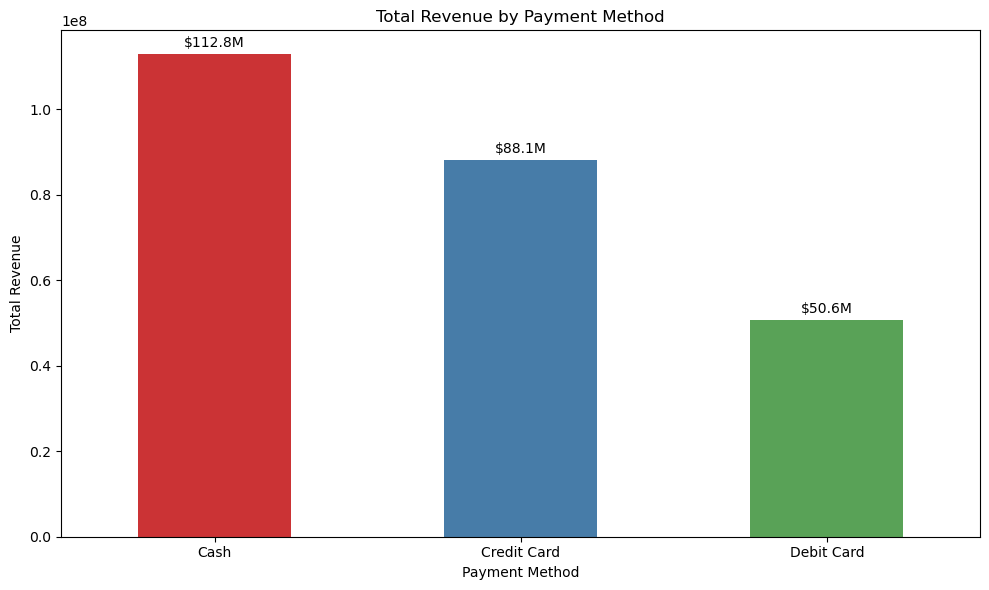

In [52]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='payment_method', y='total_revenue', data=payment_analysis, palette='Set1', width = 0.5)

plt.title('Total Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')

for bar in ax.containers:
    ax.bar_label(bar, labels=[f"${v / 1_000_000:.1f}M" for v in bar.datavalues], padding=3)


plt.tight_layout()
plt.show()

## Cash is the most popular payment method, generating the highest revenue, followed by credit cards and debit cards.

C:\Users\Acer\AppData\Local\Temp\ipykernel_10708\2369163729.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='payment_method', y='average_spend', data=payment_analysis, palette='Set1', width = 0.5)


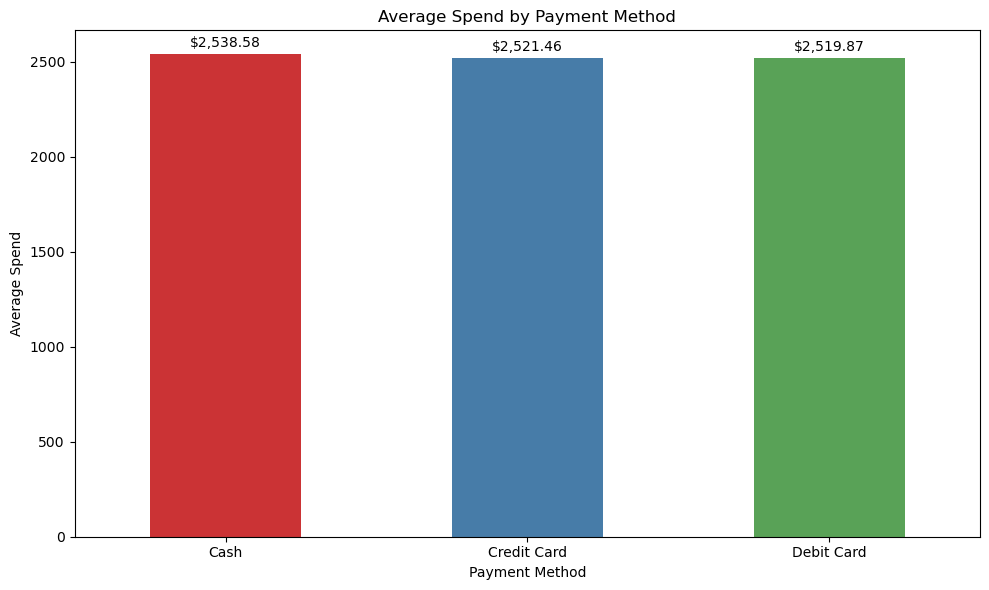

In [56]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='payment_method', y='average_spend', data=payment_analysis, palette='Set1', width = 0.5)

plt.title('Average Spend by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Spend')

for bar in ax.containers:
    ax.bar_label(bar, labels=[f"${v:,.2f}" for v in bar.datavalues], padding=3)

plt.tight_layout()
plt.show()

## The average spend is nearly identical across all payment methods, with cash slightly leading over credit and debit cards.

### This analysis reveals that cash is the most popular payment method, generating the highest revenue, followed by credit and debit cards, with average spend being nearly identical across all payment methods. Females contributed more to total revenue due to a higher number of purchases, while males had similar spending per transaction. The 31-45 and 46-60 age groups generated the highest revenue, with average basket sizes consistent across all age groups. Clothing emerged as the top revenue-generating category, followed by shoes and technology. Malls of Istanbul recorded the highest sales and transactions, with January and February showing seasonal peaks in monthly sales, and Monday leading weekly sales with consistent revenue across other weekdays.